# Виды распределений




## Задача 1

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
%%time
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics

%matplotlib inline

# До какого знака округляем все вычисления
round_N = 3

Wall time: 1.42 s


Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
%%time
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

Wall time: 654 ms


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



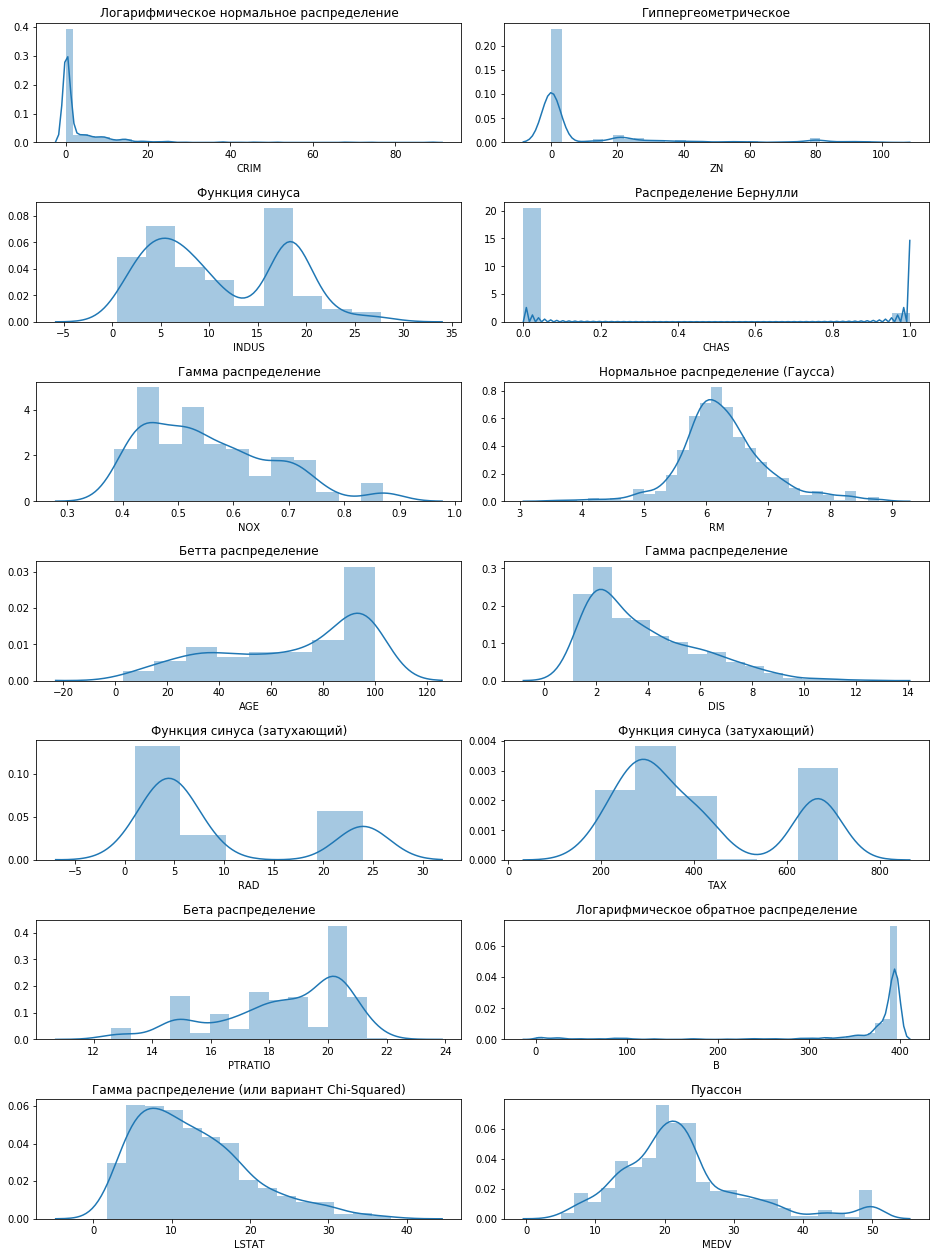

Wall time: 9.57 s


In [3]:
%%time

# Рисуем графики распределений

rows = (len(data.columns)+1)//2
cols = 2
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16,22))
plt.subplots_adjust(wspace=.1, hspace=.5)
titles = [
    'Логарифмическое нормальное распределение',
    'Гиппергеометрическое',
    'Функция синуса',
    'Распределение Бернулли',
    'Гамма распределение',
    'Нормальное распределение (Гаусса)',
    'Бетта распределение',
    'Гамма распределение',
    'Функция синуса (затухающий)',
    'Функция синуса (затухающий)',
    'Бета распределение',
    'Логарифмическое обратное распределение',
    'Гамма распределение (или вариант Chi-Squared)',
    'Пуассон',
]


for i, x in enumerate(data.columns):
    plt.subplot(rows, cols, i+1)
    axes = sns.distplot(data[str(x)])
    axes.set_title(titles[i])
    
    
# На память сохраним себе графики
plt.savefig('rasp_dz-2.png', format='png', dpi=600)
plt.show()

In [4]:
%%time

# Напишите код, который будет рисовать распределения попарно - точечные распределение
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df.head()

Wall time: 559 ms


,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [5]:
df['Country'] = df['Country (region)']
del df['Country (region)']

df.fillna(method='ffill')

df.head()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy,Country
0,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,Finland
1,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,Denmark
2,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,Norway
3,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,Iceland
4,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,Netherlands


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


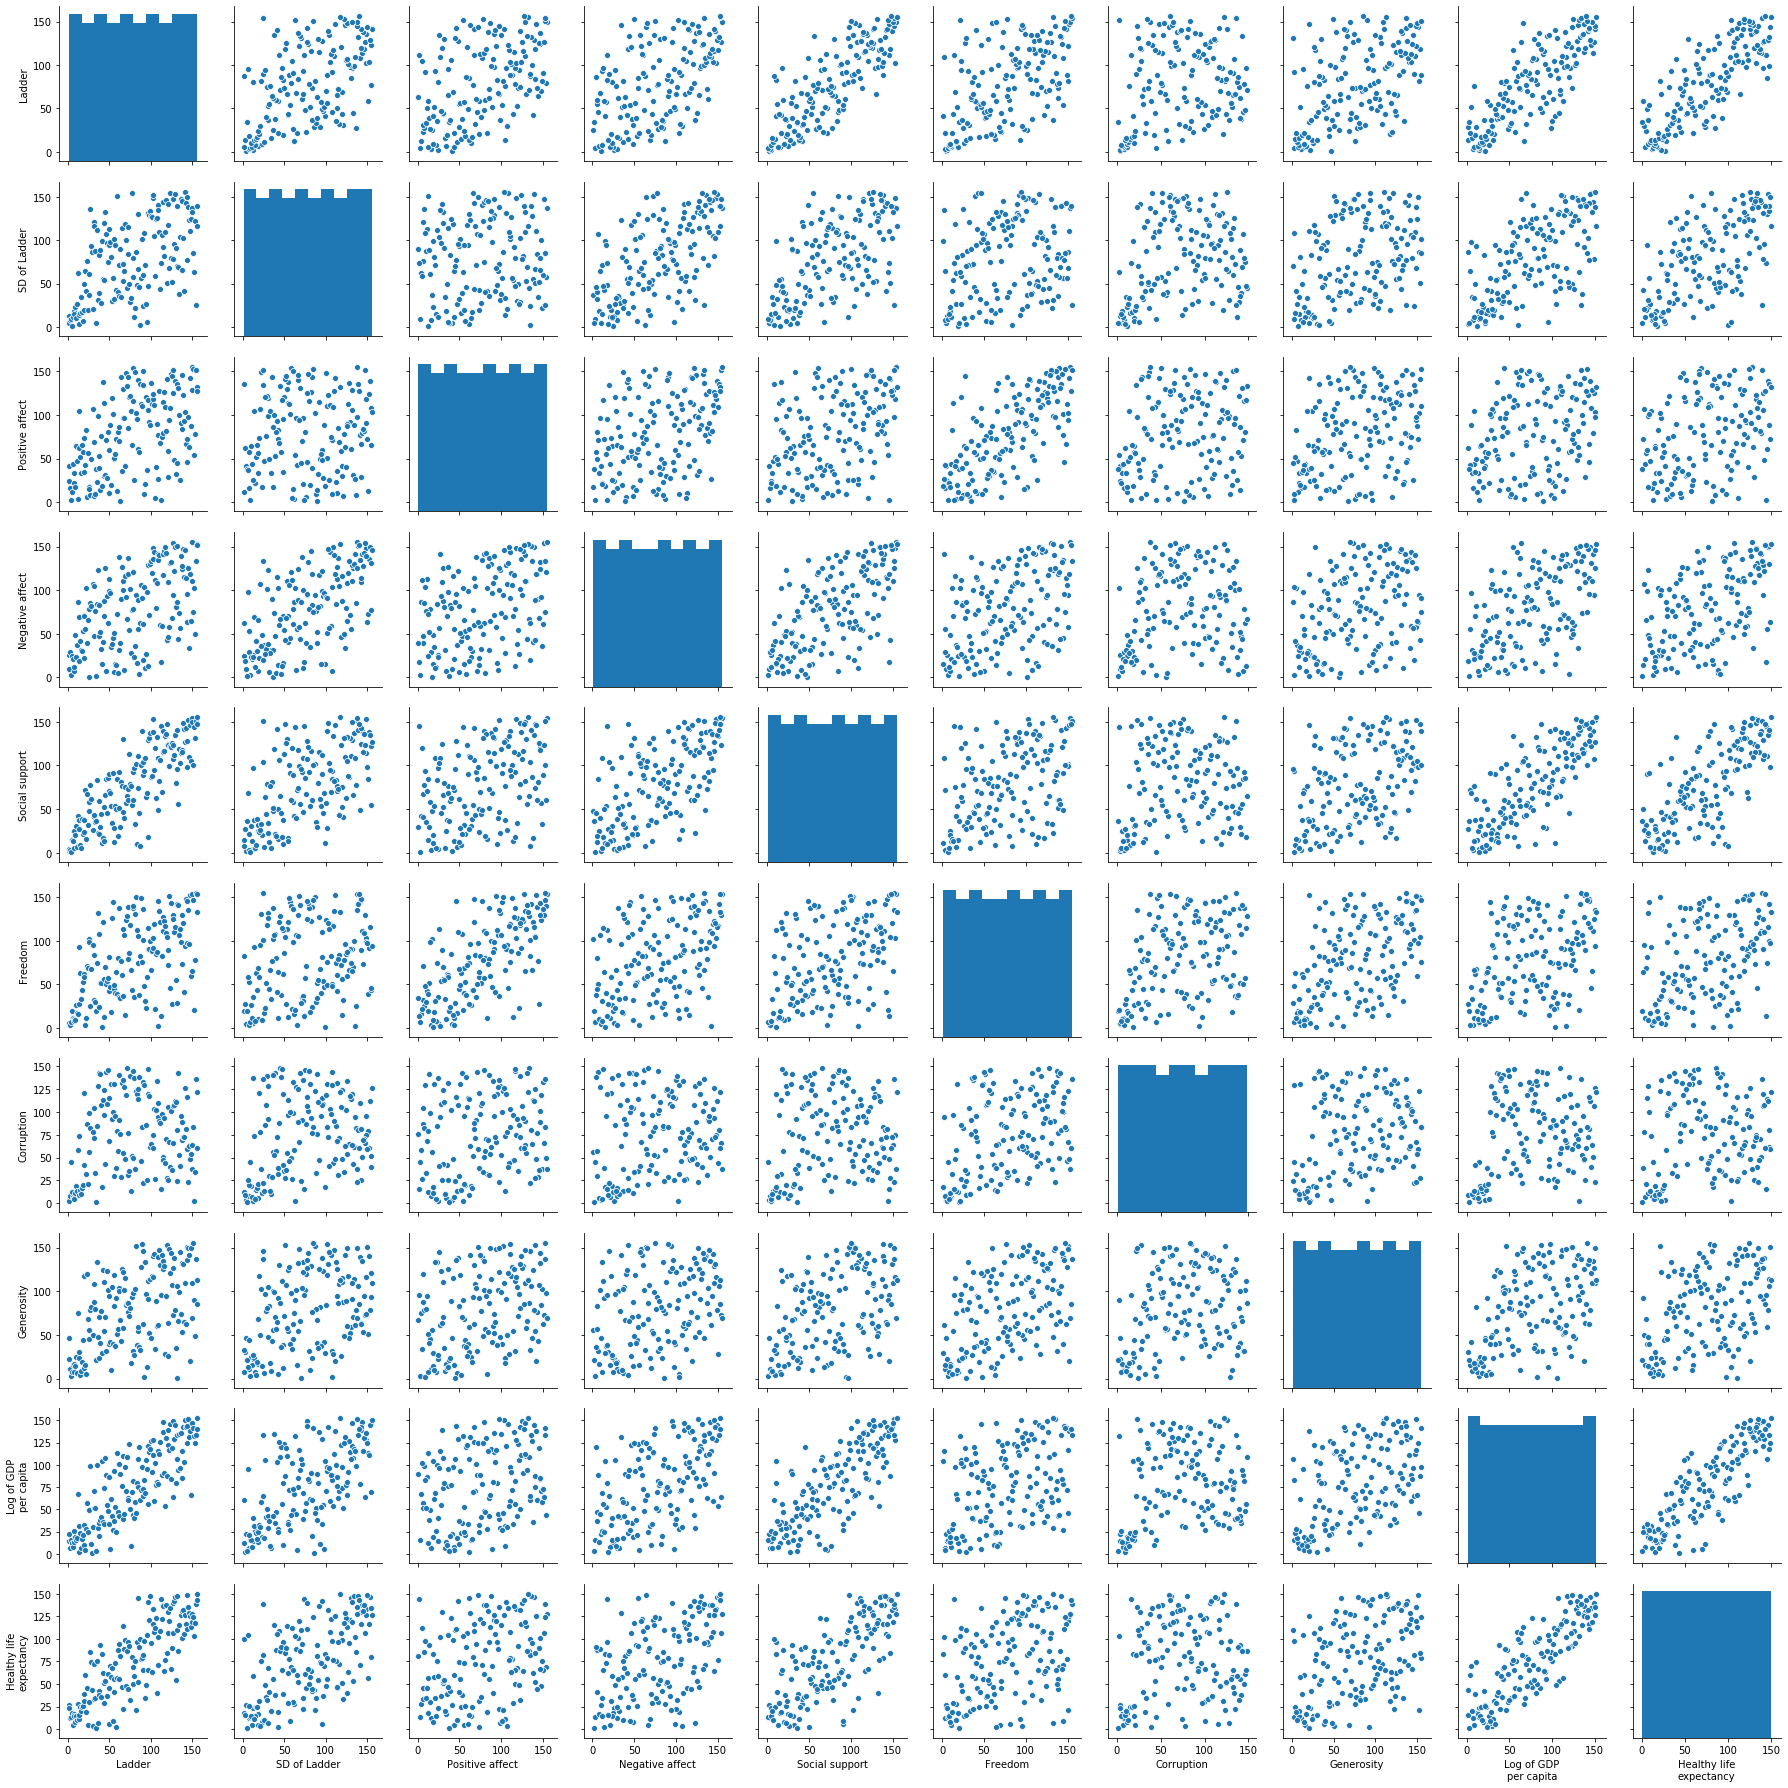

Wall time: 20.8 s


In [6]:
%%time
# fig = sns.pairplot(data=df, hue='Country')
fig = sns.pairplot(data=df)
plt.show()




## Задача 2

Загрузить таблицу Happiness report. Нарисовать матрицу ковариаций попарно. 

In [7]:
%%time

url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
happy_df=pd.read_csv(url)
happy_df.head()

# Создаем матрицу
X = happy_df.copy(deep=True)

# Убираем столбец 'Country (region)'
del X['Country (region)']


X.head()


Wall time: 559 ms


,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [8]:
%%time
# Для удобства переименуем столбец `Country (region)`

happy_df.rename(columns={'Country (region)': 'Region'}, inplace=True)
happy_df.dropna(inplace=True)
happy_df.replace(0,0.1)
happy_df.head()


Wall time: 10 ms


,Region,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [9]:
%%time
# Смотрим размерность полученной матрицы
print(np.shape(X))

(156, 10)
Wall time: 1e+03 µs


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [10]:
%%time

# Смотрим сколько в Выборке отсутсвующих (NaN) значений
print(f'В матрице {X.isnull().values.sum()} отсутствующих значений(-я)')


В матрице 23 отсутствующих значений(-я)
Wall time: 1 ms


In [11]:
%%time
# Убриаем отсутствующие значения из матрице

# X_clear = X[~np.isnan(X).any(axis=1)]
X_clear = X.dropna()

X_clear.head()


Wall time: 2 ms


,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [12]:
%%time
# Для контроля смотрим размерность матрицы 

print(np.shape(X_clear))

(140, 10)
Wall time: 0 ns


In [13]:
%%time

''' КОВАРИАЦИЯ '''

# Вычисляем **ковариацию**
covX = np.cov(X_clear).round(decimals=round_N)
print(f'В матрице {X_clear.isnull().values.sum()} отсутствующих значений(-я)')
covX

В матрице 0 отсутствующих значений(-я)
Wall time: 2 ms


array([[ 2.897890e+02,  1.197670e+02,  4.433300e+01, ...,  1.251330e+02,
        -8.817800e+01, -1.776440e+02],
       [ 1.197670e+02,  9.090000e+01,  6.088900e+01, ..., -2.902200e+01,
        -1.204400e+01,  6.422000e+00],
       [ 4.433300e+01,  6.088900e+01,  6.288900e+01, ..., -1.000000e+01,
         8.556000e+00, -7.780000e-01],
       ...,
       [ 1.251330e+02, -2.902200e+01, -1.000000e+01, ...,  1.479600e+03,
         2.942000e+02, -3.289000e+00],
       [-8.817800e+01, -1.204400e+01,  8.556000e+00, ...,  2.942000e+02,
         2.806220e+02,  3.655330e+02],
       [-1.776440e+02,  6.422000e+00, -7.780000e-01, ..., -3.289000e+00,
         3.655330e+02,  1.024489e+03]])

Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

In [14]:
'''
===> Да, это проблема классификации
'''

print(f'В выборке {len(X_clear)} стран')

В выборке 140 стран


Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.

In [15]:
happy_df[:5]

,Region,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


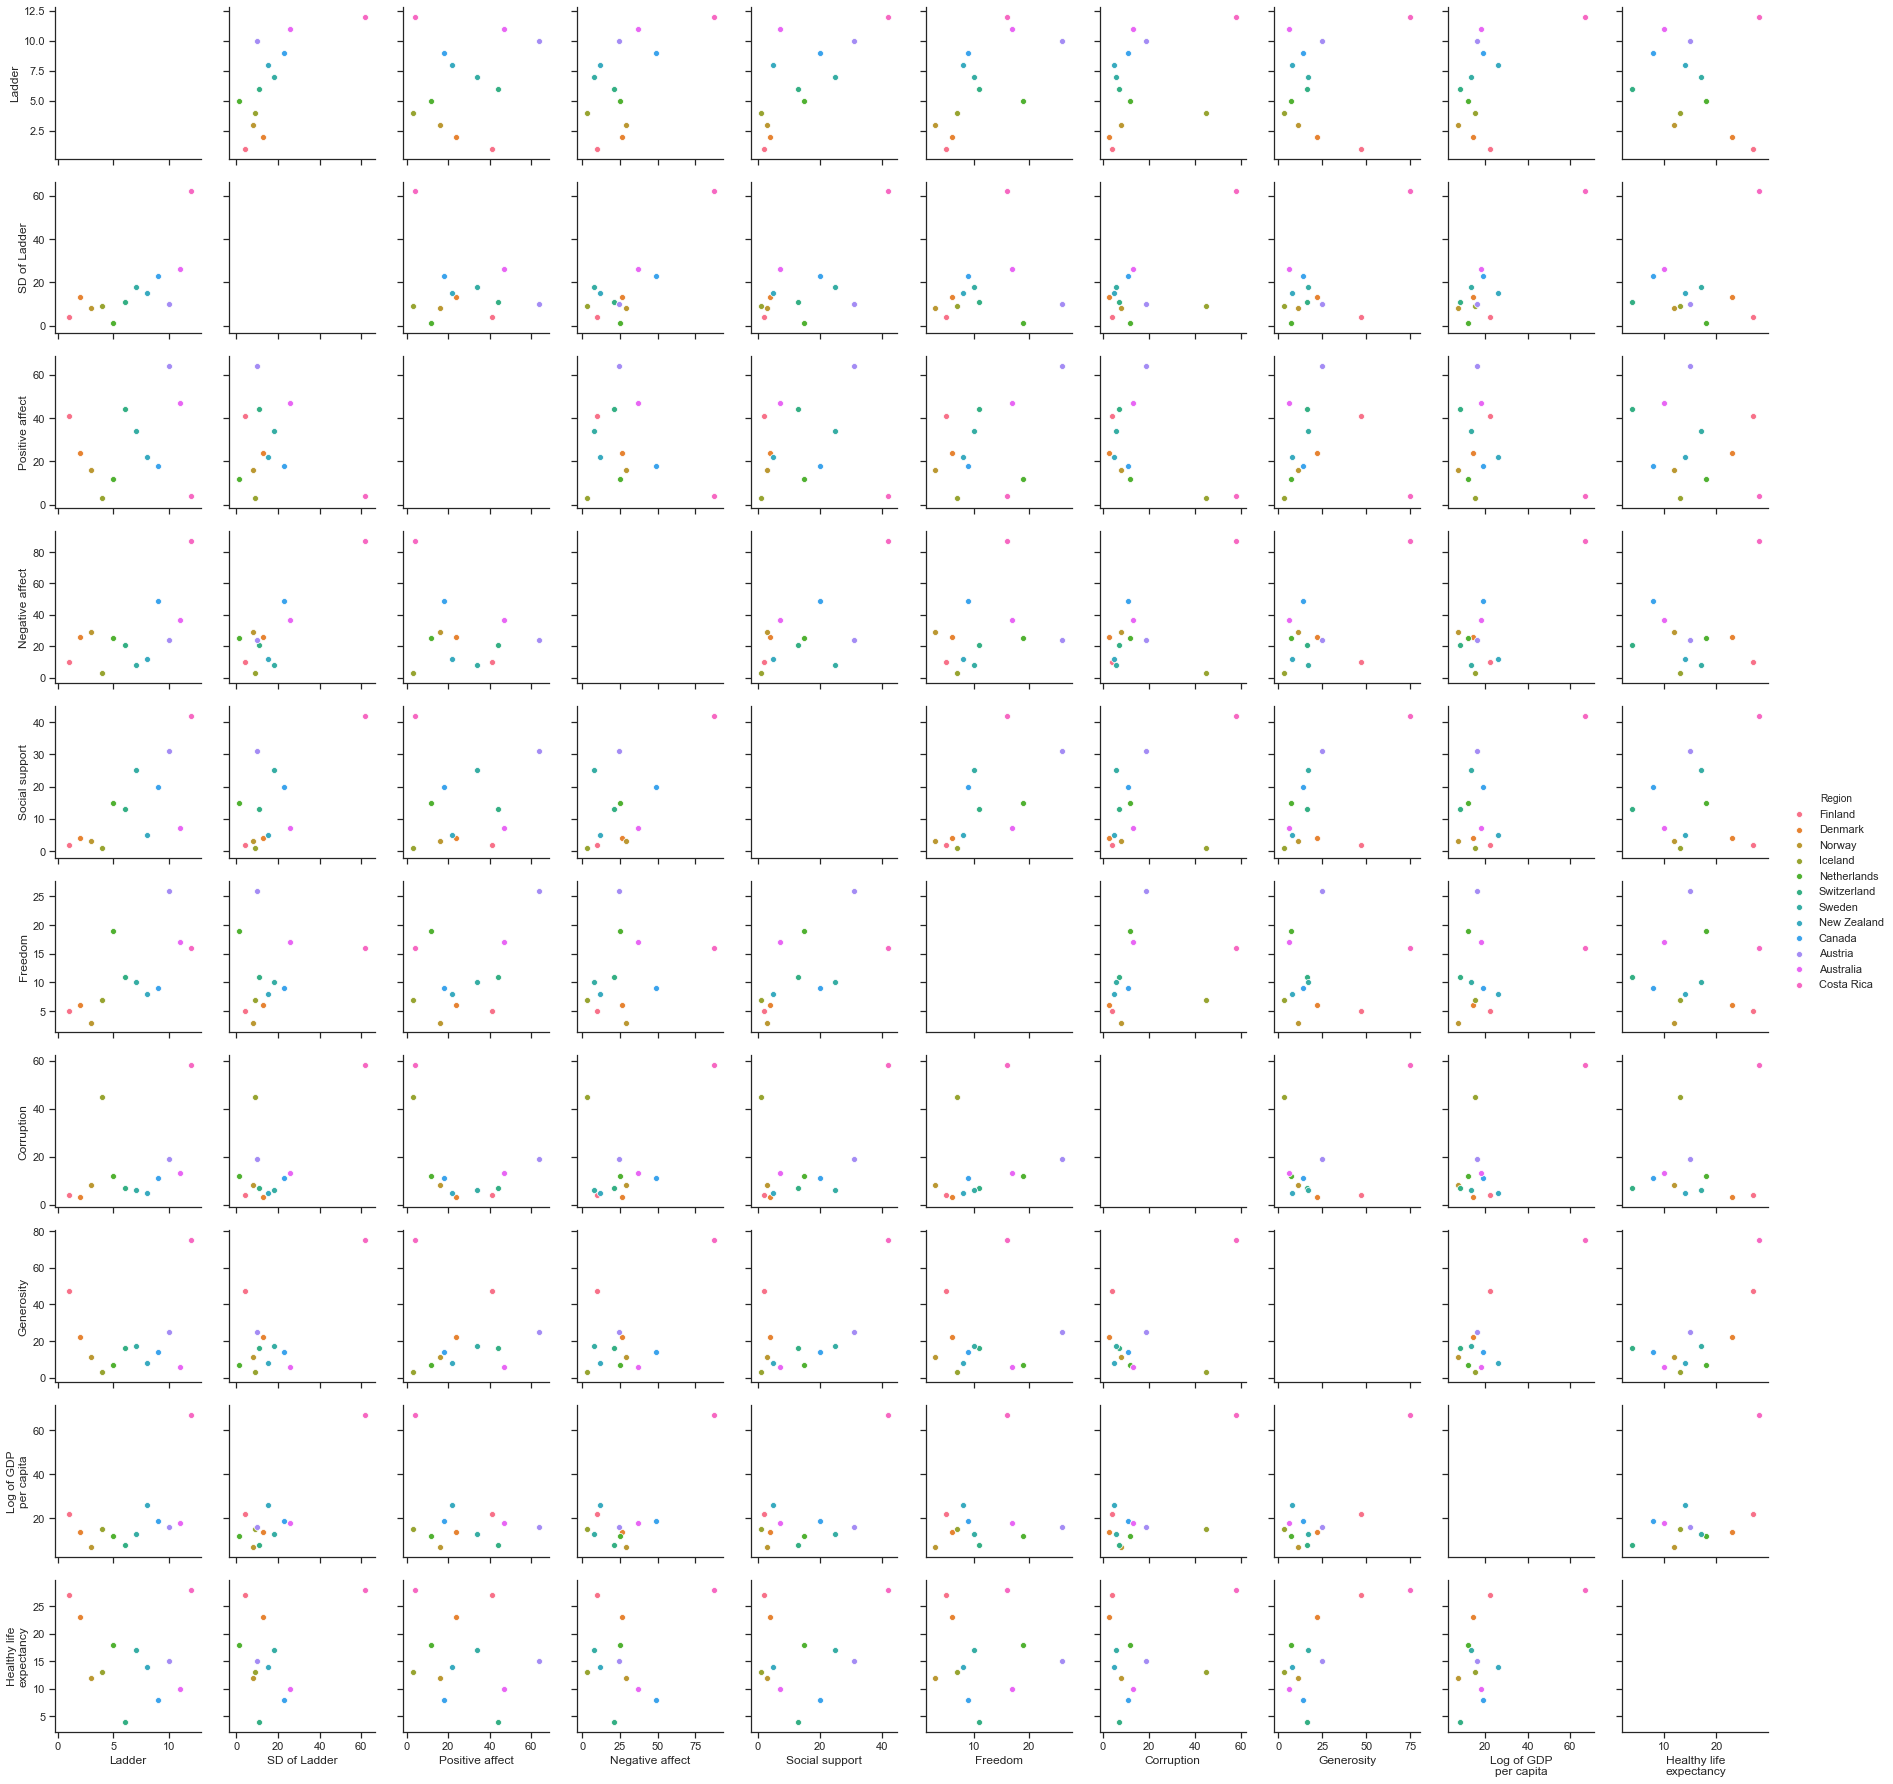

Wall time: 1min 1s


'\nДля удобства анализа еще построил матрицу корреляций.\n\nВ принципе, и на графике (если смотреть на сохраненное изображение) можно увидеть "сгустки" точек (например, Generosity). Это говорит о том, что страны похожи и их можно объединить на основе каких-то признаков.\nТак же с помощью графика и матрицы корреляции мы можем увидеть силу зависимоти одного параметра от другого. \n'

In [16]:
%%time

# Если код ниже не работает, измените код, используя материал лекций. 
# Пишите на почту, если испытываете проблемы: yustiks@gmail.com

sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=happy_df[:12], hue='Region', dropna=True)

# Сохраняем на память и чтобы получше разглядеть график 
plt.savefig('pairplot_regions.png', format='png', dpi=600)

plt.show()


'''МЫСЛИ или ВЫВОДЫ'''

'''
Для удобства анализа еще построил матрицу корреляций.

В принципе, и на графике (если смотреть на сохраненное изображение) можно увидеть "сгустки" точек (например, Generosity). Это говорит о том, что страны похожи и их можно объединить на основе каких-то признаков.
Так же с помощью графика и матрицы корреляции мы можем увидеть силу зависимоти одного параметра от другого. 
'''

Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?

In [17]:
'''КОРРЕЛЯЦИЯ'''
X2corr = X.corr().round(decimals=round_N)
X2corr

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1.000,0.539,0.491,0.524,0.818,0.547,0.190,0.498,0.813,0.817
SD of Ladder,0.539,1.000,0.085,0.619,0.599,0.252,0.259,0.392,0.630,0.611
Positive affect,0.491,0.085,1.000,0.390,0.386,0.682,0.210,0.355,0.305,0.333
Negative affect,0.524,0.619,0.390,1.000,0.622,0.430,0.159,0.338,0.542,0.489
Social support,0.818,0.599,0.386,0.622,1.000,0.449,0.118,0.442,0.773,0.741
Freedom,0.547,0.252,0.682,0.430,0.449,1.000,0.381,0.490,0.410,0.416
Corruption,0.190,0.259,0.210,0.159,0.118,0.381,1.000,0.266,0.199,0.123
Generosity,0.498,0.392,0.355,0.338,0.442,0.490,0.266,1.000,0.479,0.432
Log of GDP\nper capita,0.813,0.630,0.305,0.542,0.773,0.410,0.199,0.479,1.000,0.848
Healthy life\nexpectancy,0.817,0.611,0.333,0.489,0.741,0.416,0.123,0.432,0.848,1.000


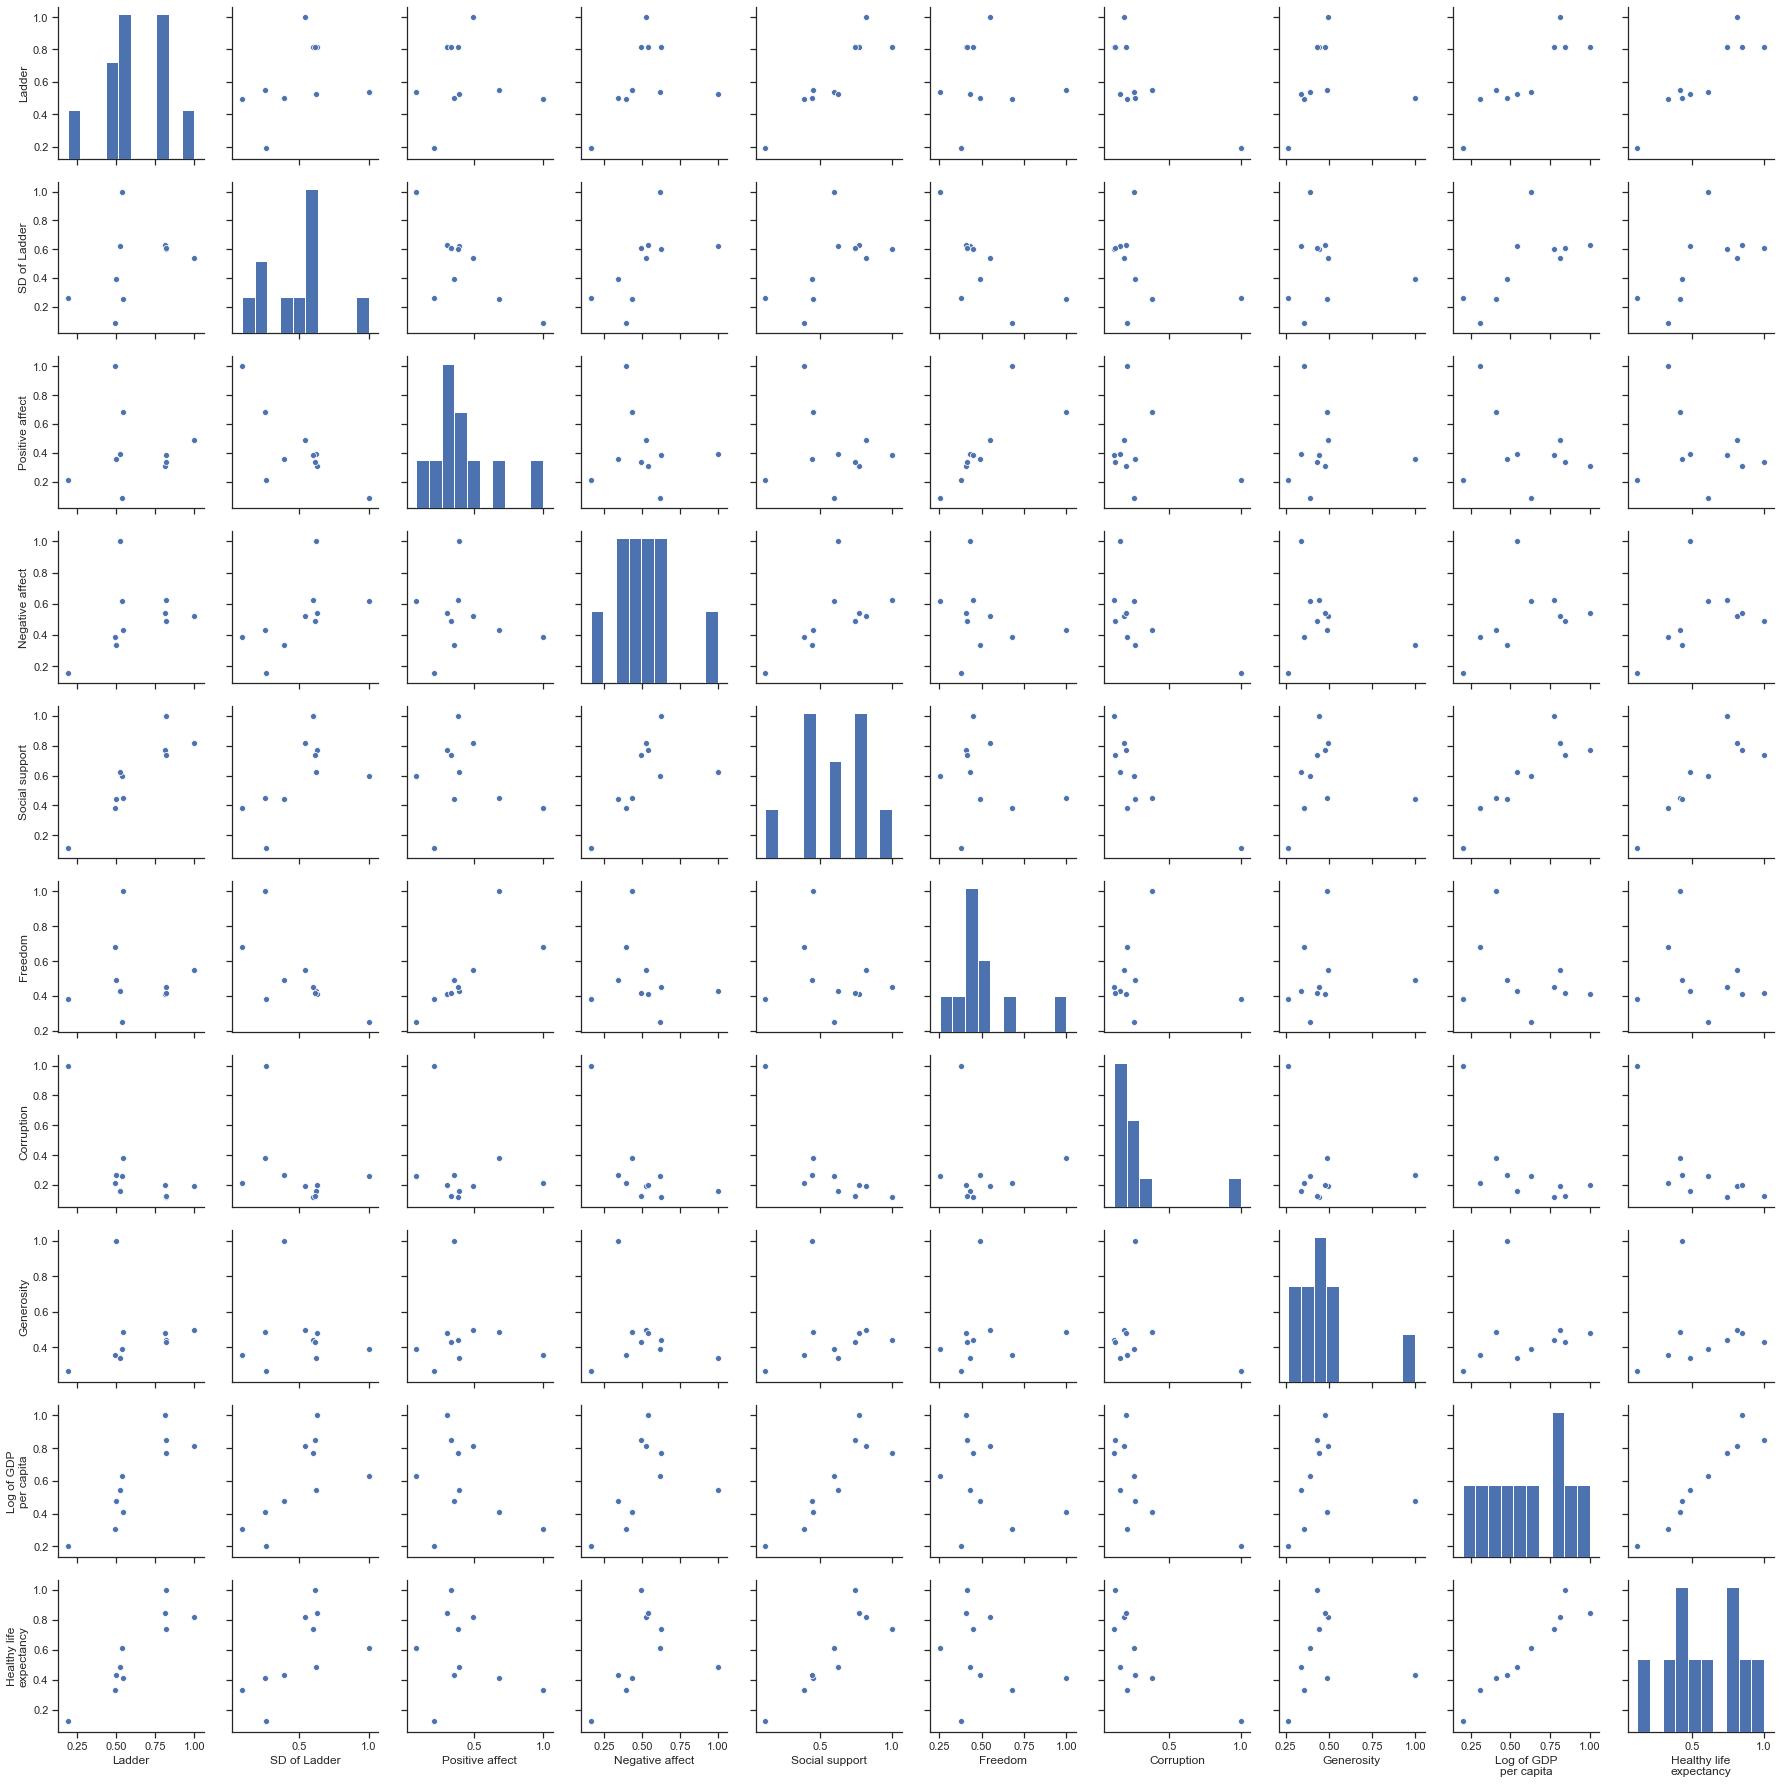

In [18]:
g = sns.pairplot(X2corr)


**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

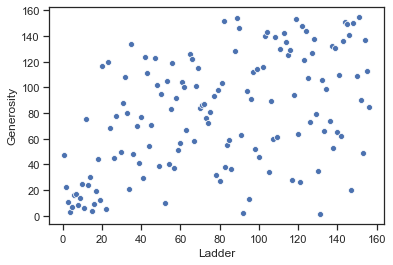

In [19]:
g = sns.scatterplot(happy_df['Ladder'], happy_df['Generosity'])

Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

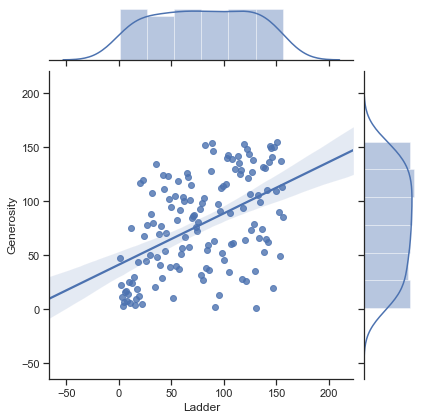

In [20]:
g = sns.jointplot(happy_df['Ladder'], happy_df['Generosity'], kind='reg')

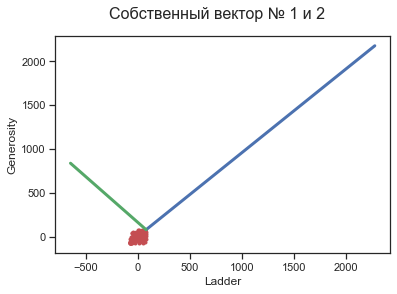

Собственное значение вектора 1:  3038.36 
Собственный вектор:  [0.72258657 0.69128044]

Собственное значение вектора 2:  1050.77 
Собственный вектор:  [-0.69128044  0.72258657]







In [21]:
# Попробуем построить на графике собственные вектора

import numpy.linalg as la
import math
from sklearn.preprocessing import StandardScaler

ladder = happy_df['Ladder']
gemer = happy_df['Generosity']


mean1 = statistics.mean(ladder)
ladder -= mean1


mean2 = statistics.mean(gemer)
gemer -= mean2

Y = np.vstack((ladder, gemer)).T
w,v = la.eig(np.cov(Y.T))



# Меняем цвета векторов
c = ['b', 'g']


# fig = plt.figure(figsize=(25,25))



# # Да бы было красиво
# ax0 = fig.add_subplot(111)
# ax0.set_xlim((-200, 100))
# ax0.set_ylim((-100, 100))

# ax1 = fig.add_subplot(111)
# ax1.set_xlim((-750, 300))
# ax1.set_ylim((-250,1000))

plt.suptitle('Собственный вектор № 1 и 2', fontsize=16)    

# Рисуем нашу матрицу    
plt.plot(ladder, gemer, 'r.', zorder=1)

# Подписи осей
plt.xlabel('Ladder')
plt.ylabel('Generosity')


# Рисуем вектора
plt.plot([mean1, mean1+w[0]*v[:,0][0]], [mean2, mean2 +w[0] * v[:,0][1]],color=c[0], linewidth=3)
plt.plot([mean1, mean1+w[1]*v[:,1][0]], [mean2, mean2 +w[1] * v[:,1][1]],color=c[1], linewidth=3)
plt.show()


# Выводим данные о векторах
print('Собственное значение вектора 1: ', round(w[0],2), '\nСобственный вектор: ', v[:,0])
print('')
print('Собственное значение вектора 2: ', round(w[1],2), '\nСобственный вектор: ', v[:,1])
print('\n\n\n\n')


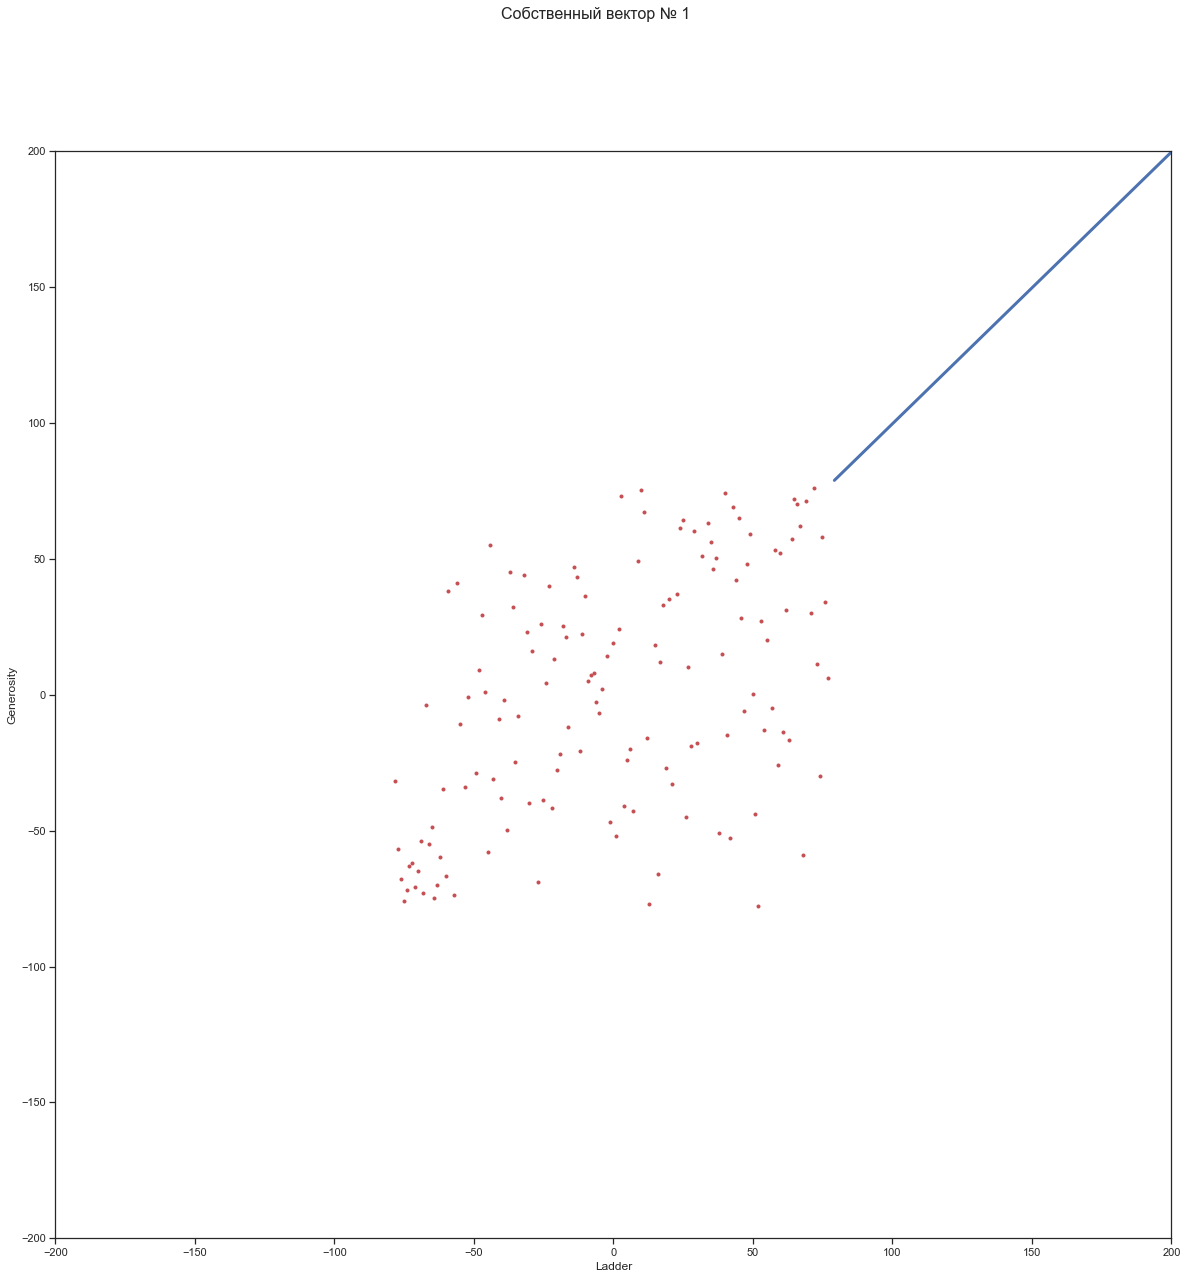

[79.15714285714286, 838.4267347501539] [78.85, 2179.208060479422]
Собственное значение вектора 1:  3038.36 
Собственный вектор:  [0.72258657 0.69128044]

При проецировании на собственный вектор разброс значений максимален!


In [22]:


# Меняем цвета векторов
c = ['b', 'g']

# # Да бы было красиво)

fig = plt.figure(figsize=(20,20))
ax0 = fig.add_subplot(111)
ax0.set_xlim((-200, 200))
ax0.set_ylim((-200, 200))

plt.suptitle('Собственный вектор № 1', fontsize=16)    

# Рисуем нашу матрицу    
plt.plot(ladder, gemer, 'r.', zorder=1)

# Подписи осей
plt.xlabel('Ladder')
plt.ylabel('Generosity')


# Рисуем вектора
plt.plot([mean1, mean1+w[0]*v[:,0][0]], [mean2, mean2 +w[0] * v[:,0][0]],color=c[0], linewidth=3)
# plt.plot([mean1, mean1+w[1]*v[:,0][1]], [mean2, mean2 +w[1] * v[:,0][1]],color=c[1], linewidth=3)
# plt.plot([-6.126052046592382e-17, -759.2695918930108], [5.1744323111993904e-17, -2100.358060479422],color=c[0], linewidth=3)


# Хотел попробовать нарисовать проекции всех точек на прямую, но не хватает знаний :(

# Сохраняем на память график
plt.savefig('111.png', format='png', dpi=500)

plt.show()

print([mean1, mean1+w[1]*v[:,0][0]], [mean2, mean2 +w[0] * v[:,0][1]])

# Выводим данные о векторах
print('Собственное значение вектора 1: ', round(w[0],2), '\nСобственный вектор: ', v[:,0])


print()
print('При проецировании на собственный вектор разброс значений максимален!')

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

Для проверки значений: [2 6 2 3 1 6 5 2 6 6]


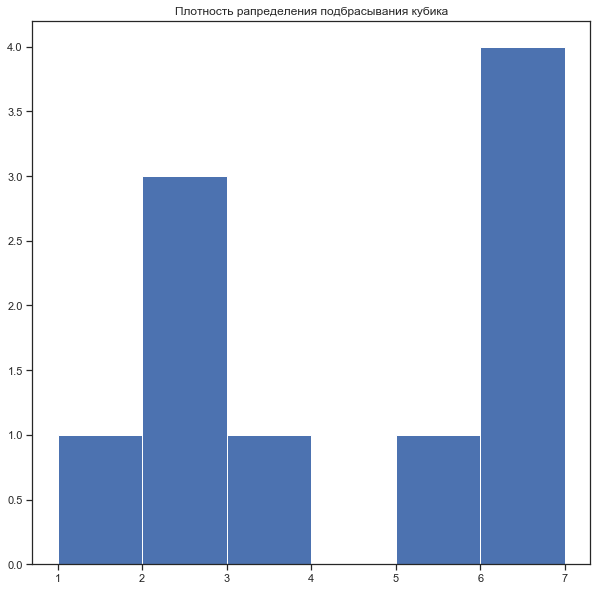

Wall time: 207 ms


In [23]:
%%time
rng = np.random.RandomState()

fig = plt.figure(figsize=(10,10))

coub_ = rng.randint(1, 7, size=10)

print('Для проверки значений:', coub_)

# ax = sns.distplot(coub_,
#                  kde=True,
#                  color="skyblue",
#                  hist_kws={"linewidth": 15,'alpha':1})


plt.hist(coub_, range(1,8))

plt.title('Плотность рапределения подбрасывания кубика')
plt.show()



Напишите код для моделирования 1000 подбрасываний игрального кубика. Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?

Для проверки один из экспериментов:  [4 1 6 4 5 4 3 3 4 4 5 4 6 2 3 4 6 2 6 1 4 2 1 2 3 1 2 1 6 4 3 6 2 4 5 3 1
 2 1 3 4 2 2 5 5 2 2 5 2 1 4 3 5 4 4 2 4 1 2 3 3 4 1 1 5 3 1 4 6 3 3 3 3 2
 5 4 4 3 5 4 1 4 6 6 4 6 3 3 3 3 5 6 2 1 1 4 3 1 1 4]


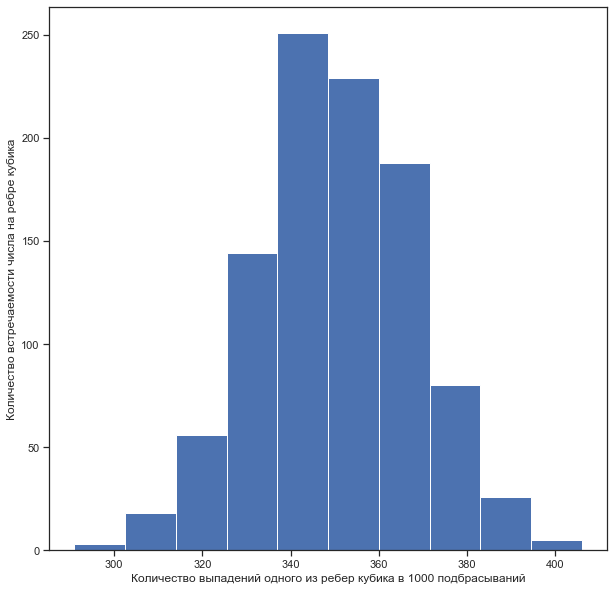

Wall time: 218 ms


In [27]:
%%time

fig = plt.figure(figsize=(10,10))

n_experiments = 1000
n_bernoulli_trials = 100

rng = np.random.RandomState(123)
outcomes = np.empty(n_experiments, dtype=np.float)

for i in range(n_experiments):
    coub2_ = rng.randint(1, 7, size=n_bernoulli_trials)
    head_counts = np.sum(coub2_)
    outcomes[i] = head_counts

print('Для проверки один из экспериментов: ', coub2_)
plt.hist(outcomes)
plt.xlabel(f'Количество выпадений одного из ребер кубика в {n_experiments} подбрасываний')
plt.ylabel('Количество встречаемости числа на ребре кубика')
plt.show()



# Это наглядное представление работы ЦПД (Центральной предельной теоремы). Если мы берем большое количество данных, 
# которые сами по себе представляют любое из известных распределений, и суммируем эти данные, то 